In this example we look at the logistic equation:

$$
\newcommand{\mtab}{\quad\quad\quad\quad}
\mtab\dot{N} = rN\left(1-\frac{N}{K}\right)
$$

where $N(t)$ is the population size at time $t$, $r$ is the growth rate and $K$ is the carrying capacity.
The solution of the equation is:

$$
\mtab N(t) = \frac{N_0K}{N_0+(K-N_0)e^{-rt}}
$$

where the initial condition is $N(0)=N_0$. See the appendix at the end of the notebook for a derivation of the solution.

Before we start, we load `pylab`:


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Definition of the solution

In a situation like this, we want to be able to easily visualize solutions for different values of the parameters. A convenient way organize the computations is to define a function factory that generates the solution for given values of the parameter:

In [2]:
def make_solution(r, K):
    solution = lambda t, N0 : N0 * K / ( N0 + (K - N0) * exp(-r * t) )
    return solution

The solution returned by `make_solution` takes two inputs: a time $t$ and an initial condition $N_0$. This is usually what we want to do, since we probably want to understand the behavior of the solution for different values of the initial condition.

Here is how we can generate and use a solution. We use the parameters $r=0.15$ and $K=23$:

In [3]:
N = make_solution(0.15, 23)

In [4]:
N(2.5, 12.4) # Population size at time 2.5 for an initial population of 12.4

14.487992941222755

In [5]:
tvalues = linspace(0, 4, 8)
N(tvalues, 25.3)   # Population sizes for 8 equally spaced t values in [0,4]; initial population 25.3

array([ 25.3       ,  25.09387001,  24.90760666,  24.73906094,
        24.58635545,  24.44784366,  24.32207628,  24.20777343])

# Solution graphs

Once the solution is defined, we can easily plot solutions:

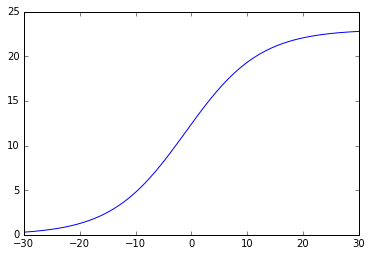

In [6]:
t = linspace(-30, 30, 300)
plot(t,N(t, 12.4))

To plot several solutions in the same graph, we can use a `for` loop:

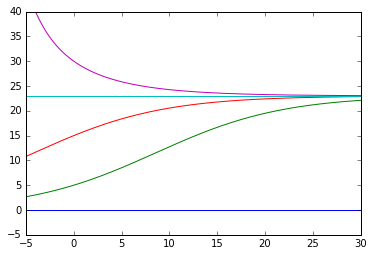

In [7]:
initial_conditions = [0, 5, 15, 23, 30]
xmin = -5
xmax = 30
ymin = -5
ymax = 40
npoints = 300
axis([xmin, xmax, ymin, ymax])  # Set axis bounds
t = linspace(xmin, xmax, npoints)
for N0 in initial_conditions:
    plot(t, N(t, N0))

In the next cell, it is shown how to change some of the options in the plot. Here is what we do:

- Draw all solutions with the same color (let's face it, the default choice of colors is horrible).
- Make solution lines thicker.
- Add a vertical line at $x=0$ for easy visualization of initial conditions.
- Add labels
- Add a title

Notice the use of $\TeX$ in the axis labels and title.

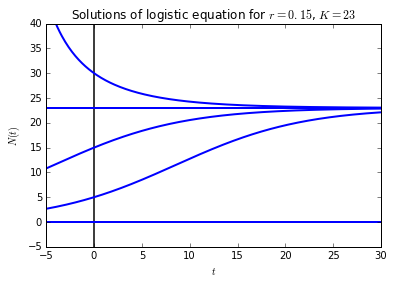

In [8]:
initial_conditions = [0, 5, 15, 23, 30]
xmin = -5
xmax = 30
ymin = -5
ymax = 40
npoints = 300
axis([xmin, xmax, ymin, ymax])  # Set axis bounds
t = linspace(xmin, xmax, npoints)
xlabel('$t$')
ylabel('$N(t)$')
title('Solutions of logistic equation for $r=0.15$, $K=23$')
axvline(x = 0, color = 'black', linewidth = 1.5)
for N0 in initial_conditions:
    plot(t, N(t, N0), color = 'blue', linewidth = 2)